In [161]:
# code here to explore your data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols
%matplotlib inline

In [162]:
df = pd.read_csv('data/kc_house_data_with_distances.csv')

In [163]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,police_dist,medical_dist,school_dist,farmers_market_dist
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.030966,0.030646,0.008650,0.034153
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.020441,0.031710,0.008436,0.025022
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000513,0.000391,0.000095,0.000199
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.017375,0.013755,0.004333,0.017622
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.027048,0.022427,0.006740,0.028935
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.039464,0.036966,0.010209,0.045282
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.339291,0.604612,0.325079,0.519270


In [164]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,geometry,police_dist,police_station_name,medical_dist,medical_name,school_dist,school_name,farmers_market_dist,farmers_market_name
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,5650,POINT (-122.257 47.5112),0.027330,West Hill Storefront,0.045415,Highline Medical Center Speciality Campus,0.002777,Amazing Grace Christian School,0.045049,Tukwila Village Farmers Market
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7639,POINT (-122.319 47.721),0.023986,Seattle Police North Precinct,0.014602,Kindred Hospital Seattle - Northgate,0.005230,St. Matthew School,0.021050,Lake City Farmers Market
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,8062,POINT (-122.233 47.7379),0.027925,Kenmore Police Department,0.034020,Fairfax Hospital,0.002265,Moorlands Elementary School,0.037623,Juanita Friday Market
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,5000,POINT (-122.393 47.5208),0.034575,Seattle Police Southwest Precinct,0.029929,Navos Mental Health Solutions,0.018994,Arbor Heights Elementary School,0.040609,West Seattle Farmers Market
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,7503,POINT (-122.045 47.6168),0.017513,Sammamish Police Department,0.034583,Swedish Pine Lake Primary Care,0.011937,Margaret Mead Elementary School,0.045950,Sammamish Farmers Market


### Bedrooms

In [165]:
df['bedrooms'].value_counts().sort_index()

1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [166]:
# dropping any larger then five, presumption being >5 not single family
df = df[df['bedrooms']<6]
df['bedrooms'].value_counts().sort_index()

1     196
2    2760
3    9824
4    6882
5    1601
Name: bedrooms, dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           21263 non-null  int64  
 1   id                   21263 non-null  int64  
 2   date                 21263 non-null  object 
 3   price                21263 non-null  float64
 4   bedrooms             21263 non-null  int64  
 5   bathrooms            21263 non-null  float64
 6   sqft_living          21263 non-null  int64  
 7   sqft_lot             21263 non-null  int64  
 8   floors               21263 non-null  float64
 9   waterfront           18937 non-null  object 
 10  view                 21202 non-null  object 
 11  condition            21263 non-null  object 
 12  grade                21263 non-null  object 
 13  sqft_above           21263 non-null  int64  
 14  sqft_basement        21263 non-null  object 
 15  yr_built             21263 non-null 

### Bathrooms 

In [168]:
df['bathrooms'].value_counts().sort_index()

0.50       4
0.75      71
1.00    3844
1.25       9
1.50    1437
1.75    3031
2.00    1905
2.25    2029
2.50    5345
2.75    1148
3.00     699
3.25     575
3.50     708
3.75     139
4.00     117
4.25      69
4.50      72
4.75      18
5.00      14
5.25       9
5.50       9
5.75       3
6.00       4
6.25       2
6.50       1
6.75       1
Name: bathrooms, dtype: int64

In [169]:
# clearing out bathrooms over 4 - given distribution these are outliers 

df = df[df['bathrooms']<=4]
df['bathrooms'].value_counts().sort_index()

0.50       4
0.75      71
1.00    3844
1.25       9
1.50    1437
1.75    3031
2.00    1905
2.25    2029
2.50    5345
2.75    1148
3.00     699
3.25     575
3.50     708
3.75     139
4.00     117
Name: bathrooms, dtype: int64

In [170]:
df = df[df['bathrooms']>=1]
df['bathrooms'].value_counts().sort_index()

1.00    3844
1.25       9
1.50    1437
1.75    3031
2.00    1905
2.25    2029
2.50    5345
2.75    1148
3.00     699
3.25     575
3.50     708
3.75     139
4.00     117
Name: bathrooms, dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 21595
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20986 non-null  int64  
 1   id                   20986 non-null  int64  
 2   date                 20986 non-null  object 
 3   price                20986 non-null  float64
 4   bedrooms             20986 non-null  int64  
 5   bathrooms            20986 non-null  float64
 6   sqft_living          20986 non-null  int64  
 7   sqft_lot             20986 non-null  int64  
 8   floors               20986 non-null  float64
 9   waterfront           18683 non-null  object 
 10  view                 20927 non-null  object 
 11  condition            20986 non-null  object 
 12  grade                20986 non-null  object 
 13  sqft_above           20986 non-null  int64  
 14  sqft_basement        20986 non-null  object 
 15  yr_built             20986 non-null 

### Waterfront

In [172]:
df['waterfront'].value_counts()
# SO few houses meet this criteria it is immaterial 

NO     18561
YES      122
Name: waterfront, dtype: int64

In [173]:
df = df.drop(columns = 'waterfront')


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20986 non-null  int64  
 1   id                   20986 non-null  int64  
 2   date                 20986 non-null  object 
 3   price                20986 non-null  float64
 4   bedrooms             20986 non-null  int64  
 5   bathrooms            20986 non-null  float64
 6   sqft_living          20986 non-null  int64  
 7   sqft_lot             20986 non-null  int64  
 8   floors               20986 non-null  float64
 9   view                 20927 non-null  object 
 10  condition            20986 non-null  object 
 11  grade                20986 non-null  object 
 12  sqft_above           20986 non-null  int64  
 13  sqft_basement        20986 non-null  object 
 14  yr_built             20986 non-null  int64  
 15  yr_renovated         17247 non-null 

### Floors

- while only a few of the maximum value their assocated values were not outliers so keeping and not changing column 

In [175]:
df['floors'].value_counts().sort_index()

1.0    10471
1.5     1864
2.0     7912
2.5      136
3.0      597
3.5        6
Name: floors, dtype: int64

### View 

Binning View column into new Boolean 'view_y_n' 

0 = No View

1 = View of indeterminate quality |

In [176]:
df['view'].value_counts()

# Given distribution worth keeping? BIN THIS NO VIEW V SOME VIEW 

NONE         18976
AVERAGE        897
GOOD           465
FAIR           315
EXCELLENT      274
Name: view, dtype: int64

In [177]:
df['view_y_n'] = df['view'].map(lambda x: 0 if x =='NONE' else 1)


In [178]:
df['view_y_n'].value_counts()

0    18976
1     2010
Name: view_y_n, dtype: int64

In [179]:
df = df.drop(columns = 'view')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20986 non-null  int64  
 1   id                   20986 non-null  int64  
 2   date                 20986 non-null  object 
 3   price                20986 non-null  float64
 4   bedrooms             20986 non-null  int64  
 5   bathrooms            20986 non-null  float64
 6   sqft_living          20986 non-null  int64  
 7   sqft_lot             20986 non-null  int64  
 8   floors               20986 non-null  float64
 9   condition            20986 non-null  object 
 10  grade                20986 non-null  object 
 11  sqft_above           20986 non-null  int64  
 12  sqft_basement        20986 non-null  object 
 13  yr_built             20986 non-null  int64  
 14  yr_renovated         17247 non-null  float64
 15  zipcode              20986 non-null 

### Grade 

Removing Luxury and Mansion lines as definition unclear compared to other grades, Removing Low as only 14 houses meet criteria.  KEEPING SINGLE FAMILY HOUSE IN MIND AS WHAT THIS TABLE IS REPPING 

In [180]:
df['grade'].value_counts()

7 Average        8829
8 Good           5947
9 Better         2556
6 Low Average    2002
10 Very Good     1043
11 Excellent      310
5 Fair            224
12 Luxury          57
4 Low              14
13 Mansion          4
Name: grade, dtype: int64

In [181]:
df = df[(df['grade'] != '13 Mansion') & (df['grade'] != '12 Luxury') & (df['grade'] != '4 Low')]

    

In [182]:
df['grade'].value_counts()

7 Average        8829
8 Good           5947
9 Better         2556
6 Low Average    2002
10 Very Good     1043
11 Excellent      310
5 Fair            224
Name: grade, dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20911 non-null  int64  
 1   id                   20911 non-null  int64  
 2   date                 20911 non-null  object 
 3   price                20911 non-null  float64
 4   bedrooms             20911 non-null  int64  
 5   bathrooms            20911 non-null  float64
 6   sqft_living          20911 non-null  int64  
 7   sqft_lot             20911 non-null  int64  
 8   floors               20911 non-null  float64
 9   condition            20911 non-null  object 
 10  grade                20911 non-null  object 
 11  sqft_above           20911 non-null  int64  
 12  sqft_basement        20911 non-null  object 
 13  yr_built             20911 non-null  int64  
 14  yr_renovated         17189 non-null  float64
 15  zipcode              20911 non-null 

In [184]:
df.index

Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,     9,
               10,
            ...
            21585, 21586, 21587, 21588, 21589, 21590, 21591, 21592, 21593,
            21595],
           dtype='int64', length=20911)

In [185]:
df.shape

(20911, 30)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20911 non-null  int64  
 1   id                   20911 non-null  int64  
 2   date                 20911 non-null  object 
 3   price                20911 non-null  float64
 4   bedrooms             20911 non-null  int64  
 5   bathrooms            20911 non-null  float64
 6   sqft_living          20911 non-null  int64  
 7   sqft_lot             20911 non-null  int64  
 8   floors               20911 non-null  float64
 9   condition            20911 non-null  object 
 10  grade                20911 non-null  object 
 11  sqft_above           20911 non-null  int64  
 12  sqft_basement        20911 non-null  object 
 13  yr_built             20911 non-null  int64  
 14  yr_renovated         17189 non-null  float64
 15  zipcode              20911 non-null 

### Year Renovated


In [187]:
df['yr_renovated'].value_counts()

0.0       16493
2014.0       72
2013.0       30
2007.0       29
2000.0       27
          ...  
1948.0        1
1951.0        1
1976.0        1
1971.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [188]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20911 non-null  int64  
 1   id                   20911 non-null  int64  
 2   date                 20911 non-null  object 
 3   price                20911 non-null  float64
 4   bedrooms             20911 non-null  int64  
 5   bathrooms            20911 non-null  float64
 6   sqft_living          20911 non-null  int64  
 7   sqft_lot             20911 non-null  int64  
 8   floors               20911 non-null  float64
 9   condition            20911 non-null  object 
 10  grade                20911 non-null  object 
 11  sqft_above           20911 non-null  int64  
 12  sqft_basement        20911 non-null  object 
 13  yr_built             20911 non-null  int64  
 14  yr_renovated         20911 non-null  float64
 15  zipcode              20911 non-null 

### Condition

In [190]:
df['condition'].value_counts()

Average      13564
Good          5510
Very Good     1650
Fair           161
Poor            26
Name: condition, dtype: int64

In [191]:
df["condition"].fillna("N/A")


0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21590      Average
21591      Average
21592      Average
21593      Average
21595      Average
Name: condition, Length: 20911, dtype: object

<AxesSubplot:>

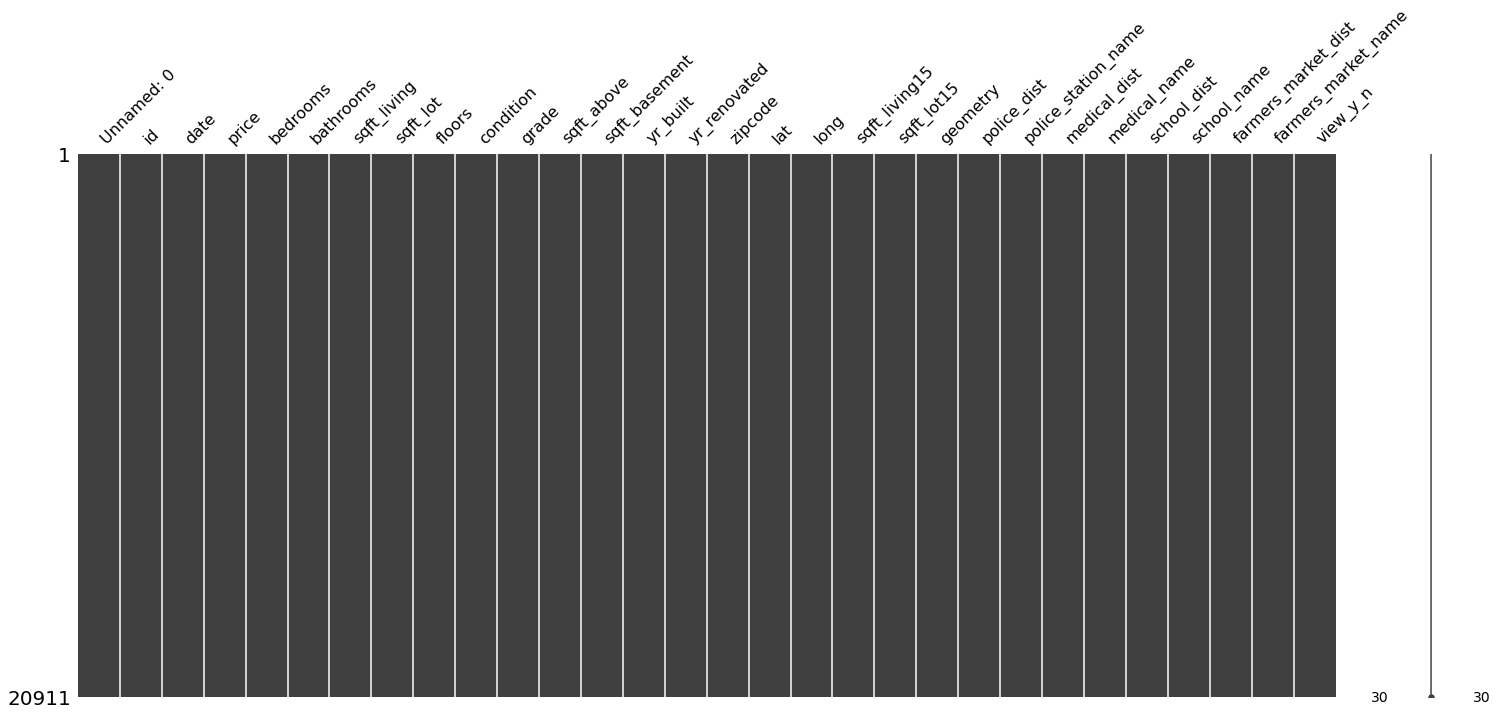

In [192]:
import missingno as msno

msno.matrix(df)


<AxesSubplot:>

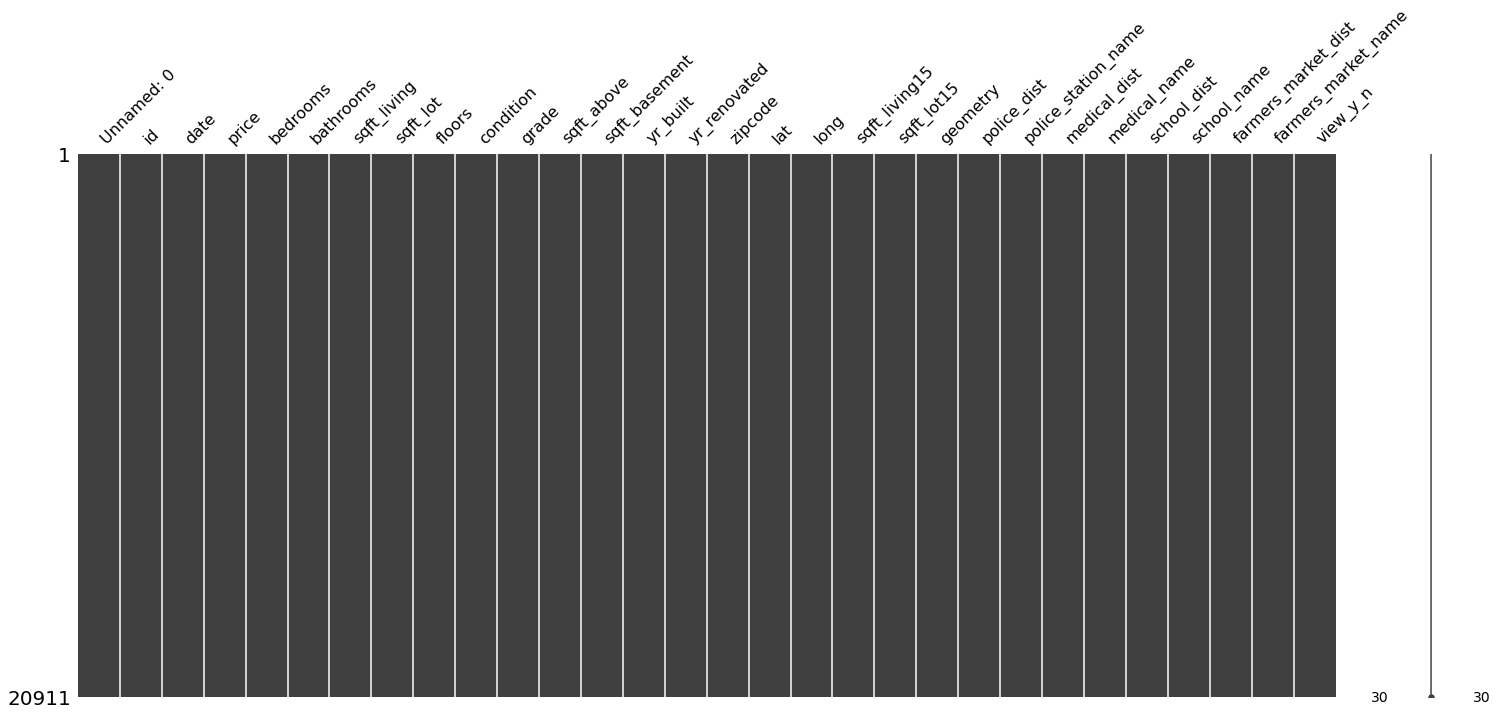

In [193]:
msno.matrix(df)


### sqft_basement

In [194]:
df['sqft_basement'].value_counts()

0.0       12544
?           438
600.0       208
500.0       206
700.0       202
          ...  
475.0         1
1135.0        1
518.0         1
2100.0        1
1770.0        1
Name: sqft_basement, Length: 278, dtype: int64

In [195]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)

df['sqft_basement'].value_counts()

0.0       12544
0           438
600.0       208
500.0       206
700.0       202
          ...  
20.0          1
65.0          1
1770.0        1
2180.0        1
915.0         1
Name: sqft_basement, Length: 278, dtype: int64

In [196]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20911 non-null  int64  
 1   id                   20911 non-null  int64  
 2   date                 20911 non-null  object 
 3   price                20911 non-null  float64
 4   bedrooms             20911 non-null  int64  
 5   bathrooms            20911 non-null  float64
 6   sqft_living          20911 non-null  int64  
 7   sqft_lot             20911 non-null  int64  
 8   floors               20911 non-null  float64
 9   condition            20911 non-null  object 
 10  grade                20911 non-null  object 
 11  sqft_above           20911 non-null  int64  
 12  sqft_basement        20911 non-null  float64
 13  yr_built             20911 non-null  int64  
 14  yr_renovated         20911 non-null  float64
 15  zipcode              20911 non-null 

In [197]:
df['sqft_basement'].value_counts()

0.0       12982
600.0       208
500.0       206
700.0       202
800.0       192
          ...  
243.0         1
1930.0        1
283.0         1
588.0         1
2220.0        1
Name: sqft_basement, Length: 277, dtype: int64

### Add basement y/n column 

0- no basement

1 = basement

In [198]:
df['basement_y_n'] = df['sqft_basement'].map(lambda x: 0 if x ==0 else 1)

In [199]:
df['basement_y_n'].value_counts()

0    12982
1     7929
Name: basement_y_n, dtype: int64

In [200]:
df.to_csv('../../data/kc_housing_CLEAN.csv')

In [201]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,...,police_dist,police_station_name,medical_dist,medical_name,school_dist,school_name,farmers_market_dist,farmers_market_name,view_y_n,basement_y_n
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,...,0.027330,West Hill Storefront,0.045415,Highline Medical Center Speciality Campus,0.002777,Amazing Grace Christian School,0.045049,Tukwila Village Farmers Market,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,...,0.023986,Seattle Police North Precinct,0.014602,Kindred Hospital Seattle - Northgate,0.005230,St. Matthew School,0.021050,Lake City Farmers Market,0,1
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,...,0.027925,Kenmore Police Department,0.034020,Fairfax Hospital,0.002265,Moorlands Elementary School,0.037623,Juanita Friday Market,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,...,0.034575,Seattle Police Southwest Precinct,0.029929,Navos Mental Health Solutions,0.018994,Arbor Heights Elementary School,0.040609,West Seattle Farmers Market,0,1
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,...,0.017513,Sammamish Police Department,0.034583,Swedish Pine Lake Primary Care,0.011937,Margaret Mead Elementary School,0.045950,Sammamish Farmers Market,0,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 21595
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20911 non-null  int64  
 1   id                   20911 non-null  int64  
 2   date                 20911 non-null  object 
 3   price                20911 non-null  float64
 4   bedrooms             20911 non-null  int64  
 5   bathrooms            20911 non-null  float64
 6   sqft_living          20911 non-null  int64  
 7   sqft_lot             20911 non-null  int64  
 8   floors               20911 non-null  float64
 9   condition            20911 non-null  object 
 10  grade                20911 non-null  object 
 11  sqft_above           20911 non-null  int64  
 12  sqft_basement        20911 non-null  float64
 13  yr_built             20911 non-null  int64  
 14  yr_renovated         20911 non-null  float64
 15  zipcode              20911 non-null 